# 第三章 Tensor和Autograd

<font size=4>**3.1 Tensor**</font>

Tensor,又名张量，从工程角度讲，可以简单的认为是一个数组，且支持高效的科学计算。它可以是一个数，一维数组，二维数组和更高阶的数组。
本质类似于numpy

In [2]:
from __future__ import print_function 
import torch as t
t.__version__

'1.1.0'

<font size=4>**3.1.1 基础操作**</font>

从接口的角度来看，对tensor的操作可以分为两类：

    1.torch.function,如torch.save等
    2.另一类是tensor.function,如tensor.view等
    
为了方便使用，对tensor的大部分操作同时支持这两类接口，是故不做具体区分，咱们当做一样处理即可，如torch.sum(torch.sum(a,b))与tensor.sum(a.sum(b))功能等价。

从存储的角度来讲，对tensor的操作可以分为两类：

    1.不会修改自身的数据，如a.add(b)，加法的结果返回一个新的tensor。
    2.会修改自身的数据，如a.add_(b),加法的结果仍然存储在a中，a被修改了。

函数名以_结尾的都是inplace的方式，即会修改调用者自身的数据，在实际应用中需要加以区分。

**创建Tensor**

在pytorch中新建tensor的方法有很多，具体如表3-1所示。

表3-1：常见新建tensor的方法

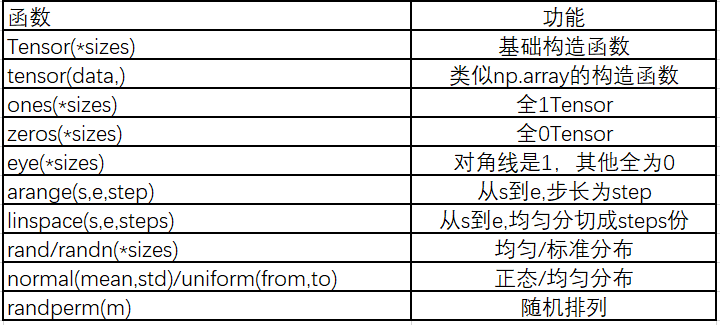


这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu)

其中使用Tensor函数新建tensor是最复杂多变的方式，它既可以接收一个list，并根据list的数据新建tensor，也能根据指定的形状新建tensor，还能传入其他tensor

In [3]:
#指定tensor的形状
a=t.Tensor(2,3)
a #数值取决于内存空间状态，print时候可能overflow

tensor([[0.0000e+00, 9.6429e-39, 1.8754e+28],
        [2.0592e+23, 2.1123e+20, 1.0027e-11]])

In [4]:
#用list的数据创建tensor
b=t.Tensor([[1,2,3],[4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [5]:
b.tolist()  #把tensor转换为list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

tensor.size()返回torch.Size对象，它是tuple的子类，但其使用方式与tuple略有区别

In [6]:
b_size=b.size()
b_size

torch.Size([2, 3])

In [7]:
print(b.numel())
print(b.nelement())
#返回的是b中的元素总个数

6
6


In [8]:
#创建一个和b形状一样的tensor
c=t.Tensor(b_size)
#创建一个元素为2和3的tensor
d=t.Tensor((2,3))
c,d

(tensor([[1.7698e+31, 5.6025e-02, 1.8374e+25],
         [3.7392e-14, 1.6316e+19, 7.3909e+22]]),
 tensor([2., 3.]))

除了tensor.size(),还可以用tensor.shape直接查看tensor的形状，tensor.shape等价于tensor.size()

In [9]:
c.shape

torch.Size([2, 3])

需要注意的是，t.Tensor(*sizes)创建tensor时，系统不会马上分配空间，只是会计算剩余的内存是否足够使用，使用到tensor时才会分配，而其他操作都是创建完之后马上进行空间分配。其他常用的创建tensor的方法如下。

In [10]:
t.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [11]:
t.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [12]:
t.arange(1,6,2)

tensor([1, 3, 5])

In [13]:
t.linspace(1,10,3)

tensor([ 1.0000,  5.5000, 10.0000])

In [14]:
t.randn(2,3,device=t.device("cuda:0"))

tensor([[7.2384e-01, 1.1932e-03, 5.9171e-01],
        [3.2966e-01, 7.1110e-01, 2.1125e+00]], device='cuda:0')

In [15]:
t.randperm(5)#长度为5的随机排列

tensor([3, 4, 1, 2, 0])

In [16]:
t.eye(2,3,dtype=t.int) #对角线为1，不要求行列数一致

tensor([[1, 0, 0],
        [0, 1, 0]], dtype=torch.int32)

torch.tensor是在0.4版本新增加的一个新版本的创建tensor方法，使用的方法，和参数几乎和np.array完全一致

In [21]:
scalar=t.tensor(3.14159)
print("scalar:{},shape of scalar:{}".format(scalar,scalar.shape))

scalar:3.141590118408203,shape of scalar:torch.Size([])


In [22]:
vector=t.tensor([1,2]) 
print("vector: %s, shape of vector: %s" %(vector,vector.shape))

vector: tensor([1, 2]), shape of vector: torch.Size([2])


In [23]:
tensor=t.Tensor(1,2) #注意和t.tensor([1,2])的区别
tensor.shape

torch.Size([1, 2])

In [24]:
matrix=t.tensor([[0.1,1.2],[2.2,3.1],[4.9,5.2]])
matrix,matrix.shape

(tensor([[0.1000, 1.2000],
         [2.2000, 3.1000],
         [4.9000, 5.2000]]),
 torch.Size([3, 2]))

In [25]:
t.tensor([[0.11111,0.222222,0.3333333]],dtype=t.float64,device=t.device("cuda:0"))

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [26]:
empty_tensor=t.tensor([])
empty_tensor.shape

torch.Size([0])

**常见Tensor操作**

通过tensor.view方法可以调整tensor的形状，但必须保证调整前后元素总数一致。view不会修改自身的数据，返回的新tensor与源tensor共享内存，也即
更改其中一个，另一个也会被随之改变。在实际应用中可能经常需要添加或减少某一维度，这时候squeeze和UNsqueeze两个函数就派上用处了。

In [27]:
a=t.arange(0,6)
print(a)
print(a.view(2,3))

tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [28]:
b=a.view(-1,3) #-1表示该上面的维度不变
b.shape

torch.Size([2, 3])

In [30]:
b.unsqueeze(1) #注意形状，在第一维(下标从0开始)上增加"1"
print(b)
#等价于b[:,None]
b[:,None].shape

tensor([[0, 1, 2],
        [3, 4, 5]])


torch.Size([2, 1, 3])

In [34]:
b.unsqueeze(2).shape

torch.Size([2, 3, 1])

In [35]:
b.unsqueeze(-2) #-2表示倒数第二个维度

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [36]:
c=b.view(1,1,1,2,3)
print(c)

tensor([[[[[0, 1, 2],
           [3, 4, 5]]]]])


In [37]:
c.squeeze(0) #压缩第0维的"1"

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [38]:
c.squeeze() #把所有维度为"1"的压缩

tensor([[0, 1, 2],
        [3, 4, 5]])

In [39]:
a[1]=100
b #a修改，b作为view之后的，也会跟着修改

tensor([[  0, 100,   2],
        [  3,   4,   5]])

resize是另一种可用来调整size的方法，但与view不同，它可以修改tensor的大小。如果新大小超过了原大小，会自动分配新的内存空间，而如果新大小小于原大小，则之前的数据依旧会被保存，看一个例子

In [40]:
b.resize_(1,3)
b

tensor([[  0, 100,   2]])

In [41]:
b.resize_(3,3) #旧的数据依旧保存着，多出的大小会分配新空间
b

tensor([[                  0,                 100,                   2],
        [                  3,                   4,                   5],
        [6716309793518136371, 2462480681941163357, 7022344802737087853]])

**索引操作**

Tensor支持与numpy.ndarray类似的索引操作，语法上也类似，下面通过一些例子，讲解常用的索引操作。如无特殊说明，索引出来的结果与原tensor共享内存，也即修改一个，另一个也会跟着修改。

In [42]:
a=t.randn(3,4)
a

tensor([[-1.4217,  0.2729,  1.0211,  0.3681],
        [-0.3053, -1.8050, -1.1124, -1.2112],
        [ 0.9358, -0.3913, -0.2168, -0.2978]])

In [43]:
a[0]

tensor([-1.4217,  0.2729,  1.0211,  0.3681])

In [44]:
a[:,0]

tensor([-1.4217, -0.3053,  0.9358])

In [45]:
a[0][2]

tensor(1.0211)

In [46]:
a[0,-1] #第0行最后一个元素

tensor(0.3681)

In [47]:
a[:2]

tensor([[-1.4217,  0.2729,  1.0211,  0.3681],
        [-0.3053, -1.8050, -1.1124, -1.2112]])

In [48]:
a[:,:2]

tensor([[-1.4217,  0.2729],
        [-0.3053, -1.8050],
        [ 0.9358, -0.3913]])

In [49]:
print(a[0:1,:2])  #第0行，前两列
print(a[0,:2])  #注意两者的区别：形状不同

tensor([[-1.4217,  0.2729]])
tensor([-1.4217,  0.2729])


In [50]:
#None类似于np.newaxis,为a新增了一个轴
#等价于a.view(1,a.shape[0],a.shape[1])
a[None].shape

torch.Size([1, 3, 4])

In [51]:
a[None].shape #等价于a[None,:,:]

torch.Size([1, 3, 4])

In [52]:
a[:,None,:].shape

torch.Size([3, 1, 4])

In [53]:
a[:,None,:,None,None].shape

torch.Size([3, 1, 4, 1, 1])

In [54]:
a>1 #返回一个ByteTensor

tensor([[0, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [55]:
a[a>1] #等价于a.masked_select(a>1)
#选择结果与原tensor不共享内存空间

tensor([1.0211])

In [56]:
a[t.LongTensor([0,1])] #第0行和第1行

tensor([[-1.4217,  0.2729,  1.0211,  0.3681],
        [-0.3053, -1.8050, -1.1124, -1.2112]])

其他常用的选择函数如表3-2所示。

表3-2常用的选择函数

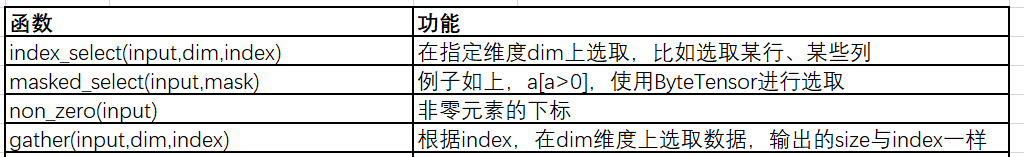

gather是一个比较复杂的操作，对一个2维tensor，输出的每个元素如下：


In [57]:
a=t.arange(0,16).view(4,4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [58]:
#选取对角线的元素
index=t.LongTensor([[0,1,2,3]])
print(index)
a.gather(0,index)

tensor([[0, 1, 2, 3]])


tensor([[ 0,  5, 10, 15]])

In [59]:
#选取反对角线上的元素
index=t.LongTensor([[3,2,1,0]]).t()
a.gather(1,index) #1代表列

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [66]:
#选取反对角线上的元素，注意与上面的不同
index=t.LongTensor([[3,2,1,0]])
a.gather(0,index)

tensor([[12,  9,  6,  3]])

In [67]:
#选取两个对角线上的元素
index=t.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
b=a.gather(1,index)
b

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

与gather相对应的逆操作是scatter_,gather把数据从input中按index取出，而scatter_是把取出的数据再放回去。注意scatter_函数是inplace操作。

out=input.gather(dim,index)

-->近似逆操作

out=Tensor()

out.scatter_(dim,index)

In [68]:
#把两个对角线元素放回去到指定位置
c=t.zeros(4,4)
c.scatter_(1,index,b.float())

tensor([[ 0.,  0.,  0.,  3.],
        [ 0.,  5.,  6.,  0.],
        [ 0.,  9., 10.,  0.],
        [12.,  0.,  0., 15.]])

对tensor的任何索引操作仍是一个tensor，想要获取标准的python对象数值，需要调用tensor.item().这个方法只对包含一个元素的tensor适用

In [69]:
a[0,0] #依旧是tensor

tensor(0)

In [70]:
a[0,0].item() #python float

0

In [71]:
d=a[0:1,0:1,None]
print(d.shape)
d.item()  #只包含一个元素的tensor即可调用tensor.item,与形状无关

torch.Size([1, 1, 1])


0

**高级索引**

pytorch在0.2版本中完善了索引操作，目前已经支持绝大多数numpy的高级索引。高级索引可以看成是普通索引的扩展，但是高级索引操作的结果一般不和原始的Tensor共享内存

In [72]:
x=t.arange(0,27).view(3,3,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [73]:
x[[1,2],[1,2],[2,0]] #即x[1,1,2]和x[2,2,0]

tensor([14, 24])

In [74]:
x[[2,1,0],[0],[1]] # x[2,0,1],x[1,0,1],x[0,0,1]

tensor([19, 10,  1])

In [75]:
x[[0,2],...] #x[0]和x[2]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

**Tensor类型**

Tensor有不同的数据类型。每种类型都有对应的CPU和GPU版本。默认的tensor是FloatTensor,可通过t.set_default_tensor_type来修改默认tensor类型。
HalfTensor是专门为GPU版本设计的，同样的元素个数，显存占用只有FloatTensor的一半。

各数据类型之间可以相互转换，type(new_type)是通用做法，同时还有float,long,half等快捷方法。CPU与GPU之间的相互转化通过tensor.cuda和tensor.cpu方法实现，此外还可以使用tensor.to(device)。Tensor还有一个new方法，用法与t.tensor一样，会调用该tensor对应类型的构造函数，生成与当前tensor类型一致的tensor。

torch.*_like(tensora)可以生成和tensora拥有同样属性的新tensor。tensor.new_*(new_shape)新建一个不同形状的tensor。

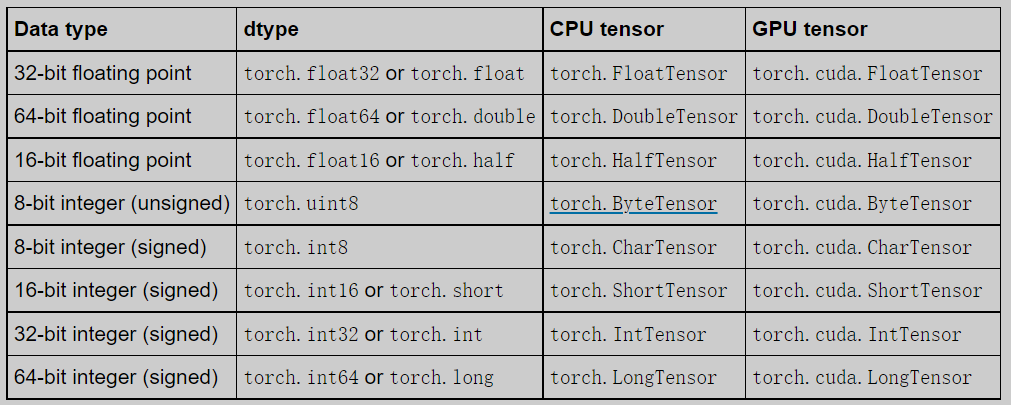

In [76]:
#设置默认tensor，注意参数是字符串
t.set_default_tensor_type("torch.DoubleTensor")

In [77]:
a=t.Tensor(2,3)
a.dtype   #现在a是DoubleTensor，dtype是float64

torch.float64

In [78]:
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [79]:
#恢复之前的默认设置
t.set_default_tensor_type("torch.FloatTensor")

In [80]:
#把a转成FloatTensor,等价于b=a.type(t.FloatTensor)
b=a.float()
b,b.dtype

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 torch.float32)

In [81]:
c=a.type_as(b)
c,c.dtype

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 torch.float32)

In [82]:
a.new(2,3)  #等价于torch.DoubleTensor(2,3),建议使用a.new_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [83]:
t.zeros_like(a) #就是完美复制a的性质，但是数字为0

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [84]:
t.zeros_like(a,dtype=t.int16) #可以修改某些属性

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)

In [85]:
t.rand_like(a)

tensor([[0.2586, 0.1253, 0.1887],
        [0.2116, 0.4812, 0.2694]], dtype=torch.float64)

In [86]:
a.new_ones(4,5,dtype=t.int)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)

In [87]:
a.new_tensor([3,4])

tensor([3., 4.], dtype=torch.float64)

In [88]:
a

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

**逐元素操作**

这部分操作会对tensor的每一个元素进行操作，此类操作的输入和输出形状一致。常用的操作如表3-4所示

表3-4：常见的逐元操作

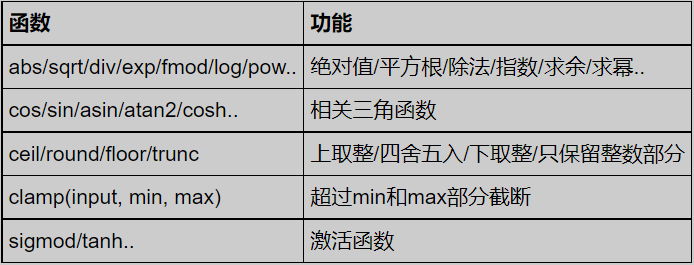

a的平方==torch.power(a,2)

a*2==torch.mul(a,2)

其中clamp(x,min,max)的输出满足以下公式：
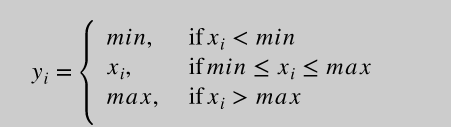

clamp常用在某些需要比较大小的地方，如取一个tensor的每个元素与另一个数的较大值

In [89]:
a=t.arange(0,6).view(2,3).float()
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [90]:
a

tensor([[0., 1., 2.],
        [3., 4., 5.]])

In [91]:
a%3 #等价于t.fmod(a,3)

tensor([[0., 1., 2.],
        [0., 1., 2.]])

In [92]:
a**2 #等价于t.pow(a,2)

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [93]:
#取a中的每一个元素与3相比较大的一个(小于3的截断成3)
print(a)
t.clamp(a,min=3)

tensor([[0., 1., 2.],
        [3., 4., 5.]])


tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [94]:
b=a.sin_()
a

tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589]])

**归并操作**

此类操作会使输出形状小于输入形状，并可以沿着某一维度进行制定操作。如加法sum，既可以计算整个tensor的和，又可以计算tensor中每一行或者每一列的和。常用的归并操作如表3-5所示。

表3-5：常用归并操作
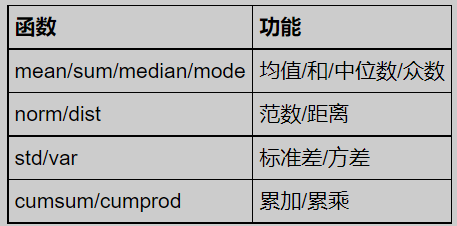

以上大多数函数都有一个参数dim,用来指定这些个操作是在哪个维度上执行的。关于dim提供一个简单的记忆方法：

假设输入的形状是(m,n,k)

* 如果指定的dim=0，输出的形状就是(1,n,k)或者(n,k)
* 如果指定的dim=1, 输出的形状就是(m,1,k)或者(m,k)
* 如果指定的dim=2，输出的形状就是(m,n,1)或者(m,n)


size中是否有"1"，取决于参数keepdim=True 会保留维度1.注意以上只是经验总结，并非所有函数都符合这种形状变化方式，如cumsum

In [95]:
b=t.ones(2,3)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [96]:
b.sum(dim=0,keepdim=True)

tensor([[2., 2., 2.]])

In [97]:
#keepdim=False,不保留维度"1",注意形状
b.sum(dim=0,keepdim=False)

tensor([2., 2., 2.])

In [98]:
b.sum(dim=1)

tensor([3., 3.])

In [100]:
a=t.arange(0,6).view(2,3)
print(a)


tensor([[0, 1, 2],
        [3, 4, 5]])


In [101]:
a.cumsum(dim=1)

tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

**比较**

比较函数中有一些是逐元比较，操作类似于逐元操作，还有一些则类似于归并操作。常见比较函数如表3-6所示。
表3-6：常用比较函数
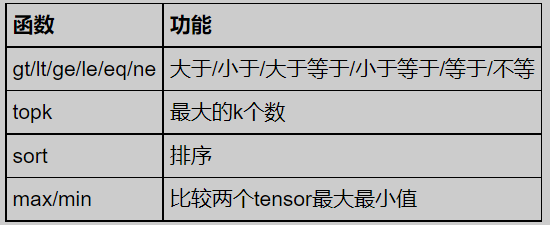

表中第一行的比较操作已经实现了运算符的重载，因此可以使用a>=b,a>b,a!=b,a==b,其返回结果是一个ByteTensor, 可用来选取元素。

max/min这两个操作比较特殊，以max来说，它有以下三种使用情况：

* t.max(tensor):返回tensor中最大的一个数
* t.max(tensor,dim):指定维度上最大的数，返回tensor和下标
* t.max(tensor1，tensor2):比较两个tensor相比较大的元素

至于比较一个tensor和一个数，可以使用clamp函数。

In [102]:
a=t.linspace(0,15,6).view(2,3)
a

tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [103]:
b=t.linspace(15,0,6).view(2,3)
b

tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [104]:
a>b

tensor([[0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [105]:
a[a>b] #a中大于b的元素

tensor([ 9., 12., 15.])

In [106]:
t.max(a)

tensor(15.)

In [107]:
t.max(b,dim=1)

torch.return_types.max(
values=tensor([15.,  6.]),
indices=tensor([0, 0]))

In [108]:
t.max(a,b)

tensor([[15., 12.,  9.],
        [ 9., 12., 15.]])

In [109]:
#比较a与10的大小
t.clamp(a,min=10)

tensor([[10., 10., 10.],
        [10., 12., 15.]])

**线性代数**

pytorch的线性函数主要封装了Blas和Lapack,其用法和接口都与之类似。常用的线性代数函数如表3-7所示。

表3-7：常用的线性代数函数
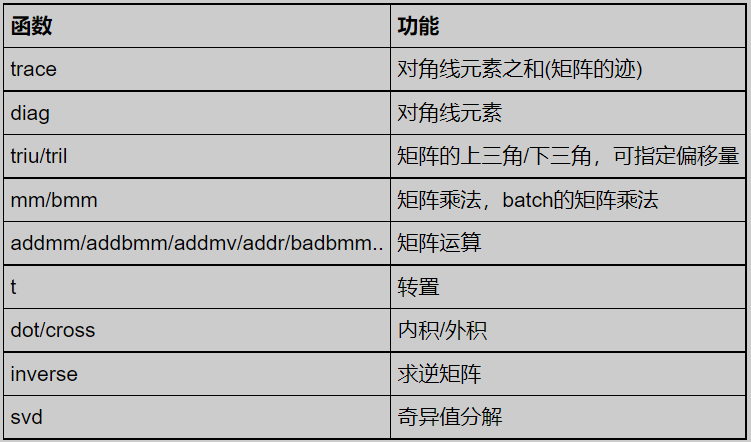

具体使用详见官网，需要注意的是，矩阵的转置会导致存储空间不连续，需调用它的.contiguous方法将其转为连续。

In [110]:
b=a.t()
b.is_contiguous()

False

In [111]:
b.contiguous()

tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])

<font size=4>**3.1.2 Tensor和Numpy**</font>

Tensor和Numpy数组之间具有很高的相似性，彼此之间的互操作也非常高效。需要注意的是，Numpy和Tensor共享内存，由于Numpy历史悠久，支持丰富的操作，所以当遇到Tensor不支持的特例时，可先转换为Numpy进行操作，再转回Tensor

In [113]:
import numpy as np
a=np.ones([2,3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [115]:
b=t.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [116]:
c=t.Tensor(a)
c

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [117]:
a[0,1]=100
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [118]:
d=b.numpy() #a,b,c,d共享内存
d

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

In [119]:
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

注意：
    
    当numpy的数据类型和Tensor的类型不一样时，数据会被复制，不会共享内存

In [121]:
a=np.ones([2,3])
#注意和上面的a的区别在于(dtype不是Float32)
a.dtype

dtype('float64')

In [122]:
b=t.Tensor(a) #此处进行拷贝，不共享内存
b.dtype

torch.float32

In [123]:
c=t.from_numpy(a) #注意C的类型(DoubleTensor)
c

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [124]:
a[0,1]=100 #类型不一样，不进行内存共享
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [125]:
c #c与a共享内存

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)

注意：

    不论输入的类型是什么，t.tensor都会进行数据拷贝，不会共享内存

In [126]:
tensor=t.tensor(a)

In [127]:
tensor[0,0]=0
a

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]])

广播法则，在快速执行向量化的同时不会占用额外的内存显存。Numpy的广播法则定义如下：

* 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分通过在前面加1补齐
* 两个数组要么在某一个维度的长度一致，要么其中一个为1，否则不能计算
* 当输入数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

pytorch当前已经支持了自动广播法则，但是手动实现以下更深刻。

* unsqueeze或者view,或者tensor[None],为数据某一维的形状补1，实现法则1
* expand或者expand_as,重复数组，实现法则3，该操作不会复制数组，不会占用额外的空间
注意，repeat会占用内存

In [128]:
a=t.ones(3,2)
b=t.zeros(2,3,1)
a,b

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([[[0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.]]]))

In [129]:
#自动广播法则
#第一步：a是2维，b是3维，所以先在较小的a前面补1
#        即：a.unsqueeze(0),a的形状变成(1,3,2) b的形状是(2,3,1)
#第二步： a和b在第一维和第三维形状不一样，其中一个为1，
#          可以利用广播法则扩展，两个形状都变为(2,3,2)
a+b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [130]:
(a+b).shape

torch.Size([2, 3, 2])

In [131]:
#手动广播法则
#或者 a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a[None].expand(2,3,2)+b.expand(2,3,2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [132]:
#expand不会占用额外空间，只会在需要的时候才扩充，可极大节省空间
e=a.unsqueeze(0).expand(10000000000000,3,2)

<font size=4>**3.1.3 内部结构**</font>

tensor的数据结构如图3-1所示。tensor分为头信息区(Tensor)和存储区(Storage),信息区主要保存着tensor的形状，步长，数据类型等信息。

而真正的数据则保存成连续数组。由于数据动辄成千上万，因此信息区元素占用内存较少，主要内存占用则取决于tensor中元素的数目，也即存储区的大小。

一般来说一个tensor有着与之相对应的storage，storage是在data之上封装的接口，便于使用，而不同tensor的头信息一般不同，但却可能使用同一个data
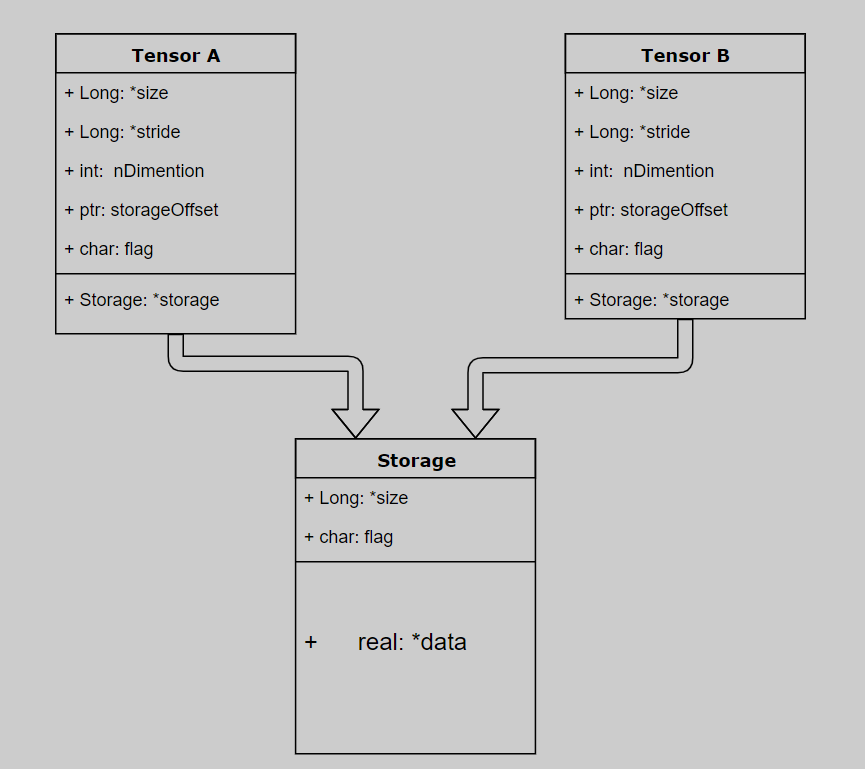

In [136]:
a=t.arange(0,6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [137]:
b=a.view(2,3)
b.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [138]:
id(b.storage())==id(a.storage())

True

In [139]:
#b will change by a changed,they are shared the same storage
a[1]=100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [140]:
c=a[2:]
c.storage()

 0
 100
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [141]:
c.data_ptr(),a.data_ptr() #data_ptr返回tensor首元素的内存地址
#可以看出相差16，这是因为2*8=16--相差两个元素，每个元素占8个字节(float)

(1891395768464, 1891395768448)

In [142]:
c[0]=-100 #c[0]的内存地址对应a[2]的内存地址
a

tensor([   0,  100, -100,    3,    4,    5])

In [143]:
d=t.LongTensor(c.storage())
d[0]=6666
b

tensor([[6666,  100, -100],
        [   3,    4,    5]])

In [144]:
#下面四个tensor共享storage
id(a.storage())==id(b.storage())==id(c.storage())==id(d.storage())

True

In [145]:
a.storage_offset(),b.storage_offset(),c.storage_offset() #起始位置

(0, 0, 2)

In [146]:
b

tensor([[6666,  100, -100],
        [   3,    4,    5]])

In [147]:
e=b[::2,::2]
e
#隔2行/列取一个元素

tensor([[6666, -100]])

In [148]:
id(e.storage())==id(a.storage())

True

In [149]:
b.stride(),e.stride()

((3, 1), (6, 2))

In [150]:
e.is_contiguous()

False

可见绝大多数操作并不修改tensor的数据，而只是修改了tensor的头信息。这种做法更节省空间。需注意有些操作会导致tensor不连续，这时需用tensor.contiguous方法将它们变成连续的数据，该方法会将数据复制一份，不再与原数据共享内存。而高级索引一般不会共享内存。

<font size=4>**3.1.4 其他**</font>

使用tensor.cuda(device_id)或者tensor.cpu(),另一个常用的方法是tensor.to(device),可以实现在gpu与cpu之间的随意传输

In [151]:
a=t.randn(3,4)
a.device

device(type='cpu')

In [153]:
a=t.randn(3,4,device=t.device("cuda:0"))
a.device

device(type='cuda', index=0)

In [154]:
device=t.device("cpu")
a.to(device)

tensor([[ 0.6998, -1.2584,  0.2378,  0.1547],
        [-0.4556, -0.0680,  0.3499,  1.4847],
        [-1.1593,  0.7394,  1.4750,  0.3631]])

**持久化**

Tensor的保存和加载十分的简单，使用t.save和t.load即可完成相应的功能。在save/load时可指定使用的pickle模块，在load时还可将GPU tensor映射到CPU或其他GPU上。

In [155]:
a=a.cuda(0)
t.save(a,"a.pth")

In [156]:
#加载为b，存储于GPU上
b=t.load("a.pth")

In [157]:
#加载为c 存储于CPU
c=t.load("a.pth",map_location=lambda storage, loc:storage)

**向量化**

In [159]:
def for_loop_add(x,y):
    result=[]
    for i,j in zip(x,y):
        result.append(i+j)
    return t.Tensor(result)

In [160]:
x=t.zeros(100)
y=t.ones(100)
%timeit -n 10 for_loop_add(x,y)
%timeit -n 10 x+y

1.5 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 7.20 times longer than the fastest. This could mean that an intermediate result is being cached.
9.53 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**注意点**

* 大多数t.function都有一个参数out,这时候产生的结果将保存在out指定的tensor中
* t.set_num_threads可以设置pytorch进行CPU多线程并行计算时候所占用的线程数，这个可以用来限制pytorch所占用的CPU的数量
* t.set_printoptions可以用来设置打印tensor时的数值精度和格式

In [161]:
a=t.arange(0,20000000)
print(a[-1],a[-2]) #32bit的inttensor精度有限导致溢出
b=t.LongTensor()
t.arange(0,20000000,out=b) #64bit的LongTensor不会溢出
b[-1],b[-2]

tensor(19999999) tensor(19999998)


(tensor(19999999), tensor(19999998))

In [162]:
a=t.randn(2,3)
a

tensor([[-0.9274,  1.3308, -0.5507],
        [-1.2853, -1.9526,  1.1399]])

In [163]:
t.set_printoptions(precision=2)
a

tensor([[-0.93,  1.33, -0.55],
        [-1.29, -1.95,  1.14]])

<font size=4>**3.1.5 小试牛刀：线性回归**</font>

In [174]:
import torch as t
import matplotlib.pyplot as plt
from IPython import display

In [188]:
#设置随机种子
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    '''
    产生随机数据：y=x*2+3,加了一些噪音
    '''
    x=t.rand(batch_size,1)*5
    y=x*2+3+t.randn(batch_size,1)
    return x,y

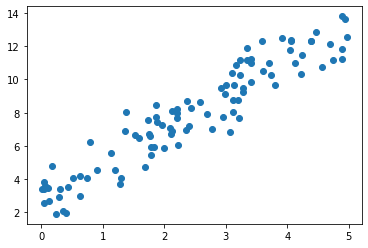

In [189]:
#绘制产生的x-y分布
x,y=get_fake_data(batch_size=100)
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())
plt.show()

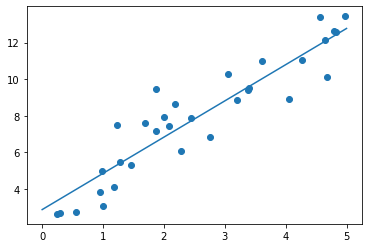

w: 2.0107531547546387 b: 3.0068442821502686


In [190]:
#随机初始化参数
w=t.rand(1,1)
b=t.zeros(1,1)

lr=0.02

for i in range(500):
    x,y=get_fake_data(batch_size=4)
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2
    loss=loss.mean()
    
    dloss=1
    dy_pred=dloss*(y_pred-y)
    
    dw=x.t().mm(dy_pred)
    db=dy_pred.sum()
    
    #更新参数
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if i%50==0:
        
        #画图
        display.clear_output(wait=True)
        x=t.arange(0,6).view(-1,1)
        y=x.float().mm(w)+b.expand_as(x)
        plt.plot(x.numpy(),y.numpy())
        
        x2,y2=get_fake_data(batch_size=32)
        plt.scatter(x2.numpy(),y2.numpy())
        

        plt.show()
        plt.pause(0.5)
print("w:",w.item(),"b:",b.item())